In [51]:
#Load libraries
import pandas as pd #for data analysis
import numpy as np #for mathematical operations on arrays
import seaborn as sns # for data visualization and exploratory data analysis
import os
import matplotlib.pyplot as plt # to plot some parameters in seaborn

import plotly.offline as py #enables Python users to create beautiful interactive web-based visualizations 
py.init_notebook_mode(connected=True) # for offline plotly version
import plotly.graph_objs as go # to plot parameters
import plotly.tools as tls # enables Python users to create beautiful interactive web-based visualizations
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [52]:
#Importing the data 'loan.csv' 
df = pd.read_csv('loan.csv')
df.shape

C:\Users\moins\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



(39717, 111)

## Cleaning Data

In [53]:
# we do not see any unnecessary header or footer, so no row is dropped
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [54]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# let us check if there are any duplicate rows

df = df.drop_duplicates()
df.shape

# the number of rows did not reduce, meaning no duplicate rows

(39717, 111)

In [56]:
# here we are going to remove the columns which has only 'na' values.

df = df.dropna(axis = 1, how = 'all')
df.shape

# after we have removed the columns with 'na', values we are left with 57 columns

(39717, 57)

In [57]:
# here we are checking the number of unique characters in each column

df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19614
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [58]:
# here we are dropping the columns which have only one value

# 'url' column is dropped, as its of no use
# dropping 'out_prncp_inv' as it is duplicate of 'out_prncp'
# sub_grade - dropping sub grade as we already have 'grade' and nothing unique seen under sub grade
# dropping 'desc', as no useful info present

df = df.drop(labels=['desc','sub_grade','out_prncp_inv','url','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','initial_list_status','pymnt_plan'],axis=1)

#dropping further variables that are not important for analysis

df = df.drop(labels=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)


df.shape


# the num of columns has reduced to 25


(39717, 25)

In [59]:
# let us check how much 'na' value is present in column 
df.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
pub_rec_bankruptcies        697
dtype: int64

In [60]:
# dropping further variables which has atleast 60% missing data

df = df.drop(labels=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],axis=1)
df.shape

# the num of columns has reduced to 22


(39717, 22)

In [61]:
# let us clean unnecessary characters such as '%' etc.,

df['term'] = df['term'].str.rstrip('months')
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['emp_length'] = df["emp_length"].str.split(' year').str[0].str.split('+').str[0]

# cleaning emp_lenght, for less than an year lets make it '0' for our understanding 

df['emp_length'] = df["emp_length"].str.split(' year').str[0].str.split('+').str[0]
df['emp_length'] = df['emp_length'].str.replace('< 1','0')

df.shape


(39717, 22)

In [62]:
# lets read the data further 

df.head()

# 'loan_status' - Fully Paid meaning already paid without default, Charged off - meaning its a default, Current - meaning its a onging loan
# we could have drop the rows where 'loan_status' is 'current', but we shall retain as it is not disturbing our analysis

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,NaN,...,24000.0,Verified,11-Dec,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,Ryder,...,30000.0,Source Verified,11-Dec,Charged Off,car,bike,309xx,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,NaN,...,12252.0,Not Verified,11-Dec,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,...,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,917xx,CA,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,University Medical Group,...,80000.0,Source Verified,11-Dec,Current,other,Personal,972xx,OR,17.94,0.0


In [63]:
# since we have dropped missing values earlier, the Non-Null Count is in an acceptable range in all columns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   emp_title             37258 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

In [64]:
# the data type of 'term','int_rate','emp_length' to be converted to float64

df.term = df.term.astype('float64')
df.int_rate = df.int_rate.astype('float64')
df.emp_length = df.emp_length.astype('float64')

In [65]:
# now we see data type of 'term','int_rate','emp_length'is float64
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  float64
 6   int_rate              39717 non-null  float64
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   emp_title             37258 non-null  object 
 10  emp_length            38642 non-null  float64
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

## Data is ready to be analysed

### Let us first read and understand Data

<AxesSubplot:>

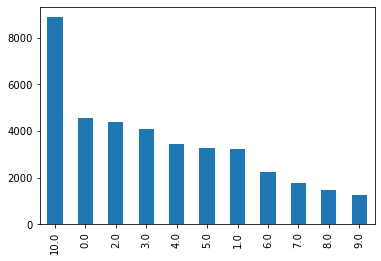

In [66]:
# we see that as the employment duration increases, people tend to reduce applying for loans, this could be because the financial stability increases

df.emp_length.value_counts().plot(kind='bar')

# here '0' means '<1' in employement, '10' is '>10' 
# in this analysis we will not consider 10, as '>10' can mean 11, 12, 13,..as well

<AxesSubplot:ylabel='term'>

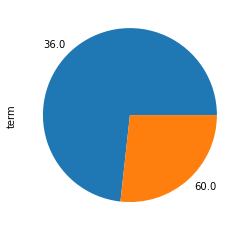

In [67]:
# most of the people have choosen 36 months tenure over 60 months

(df['term'].value_counts(1)*100).plot(kind='pie')

In [68]:
# Below Visualization provides us an idea on Fully paid vs Charged Off

tr0 = go.Bar(
            x = df[df["loan_status"]== 'Fully Paid']["loan_status"].value_counts().index.values,
            y = df[df["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values,
            name='Fully Paid'
    )

tr1 = go.Bar(
            x = df[df["loan_status"]== 'Charged Off']["loan_status"].value_counts().index.values,
            y = df[df["loan_status"]== 'Charged Off']["loan_status"].value_counts().values,
            name='Charged Off'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Loan Status Variable'
    ),
    title='Fully paid vs Charged Off'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

# we see that overall the charged off is less when compared to Paid fully

In [69]:
# irrespective of employement length, people still go with 36 over 60months

df.groupby('term')['emp_length'].value_counts().unstack()

# in next analysis let us see why majority of population is choosing 36months

emp_length,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
term,,,,,,,,,,,
36.0,3679,2584,3413,3092,2560,2351,1565,1251,1049,904,5839
60.0,904,656,975,1003,876,931,664,522,430,354,3040


<AxesSubplot:xlabel='term'>

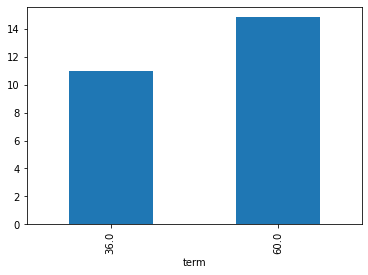

In [70]:
# the interest rate of 60months tenure is more, hence people are prefering 36months

df.groupby('term')['int_rate'].mean().plot(kind='bar')

17.481450670657114

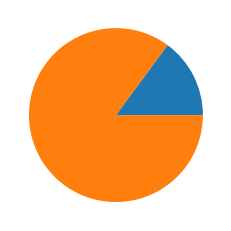

In [71]:
#on an average the loan amount provided is around 17.48% of the annual salary

f = ((df['funded_amnt_inv']/df['annual_inc'])*100).mean()
y = np.array([f, 100])

plt.pie(y)
f


## Driving factors (or driver variables) behind loan default

### Defaulters rate with respect to house ownership

In [72]:
# plot for fully paid data
tr0 = go.Bar(
    x = df[df["loan_status"]== 'Fully Paid']["home_ownership"].value_counts().index.values,
    y = df[df["loan_status"]== 'Fully Paid']["home_ownership"].value_counts().values,
    name='Paid'
)

# plot for defaulter's data
tr1 = go.Bar(
    x = df[df["loan_status"]== 'Charged Off']["home_ownership"].value_counts().index.values,
    y = df[df["loan_status"]== 'Charged Off']["home_ownership"].value_counts().values,
    name="Default"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Loan status vs Housing'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Loan_status_vs_house_ownership')

# we see that, less people with own house apply for loans and they default less as well
# most of the people who have applied for loan are living in rented house or house under mortgage, default rate is high as well when compared to Own housed people


In [73]:
# here we can see as the Grade moves from A to G, the chances of a person defaulting a loan will increase

df.groupby('grade')['loan_status'].value_counts().unstack()

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,602,40,9443
B,1425,345,10250
C,1347,264,6487
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


In [74]:
tr0 = go.Bar(
x = df[df["loan_status"]== 'Fully Paid']["grade"].value_counts().index.values,
y = df[df["loan_status"]== 'Fully Paid']["grade"].value_counts().values,
name='Paid'
)


tr1 = go.Bar(
x = df[df["loan_status"]== 'Charged Off']["grade"].value_counts().index.values,
y = df[df["loan_status"]== 'Charged Off']["grade"].value_counts().values,
name="Default"
)
data = [tr0, tr1]



layout = go.Layout(
title='Loan status vs Grade'
)




fig = go.Figure(data=data, layout=layout)



py.iplot(fig, filename='Loan_status_vs_house_ownership')

In [75]:
# here we can see that verification has almost no effect on if a person is going to default
# almost same number of verified as well as unverified people have defaulted loan

df_paid = df.loc[df["loan_status"] == 'Fully Paid']['verification_status'].values.tolist()
df_default = df.loc[df["loan_status"] == 'Charged Off']['verification_status'].values.tolist()
df_verification = df['verification_status'].values.tolist()

tr0 = go.Histogram(
    x=df_paid ,
    histnorm='probability',
    name="Fully Paid"
)

tr1 = go.Histogram(
    x=df_default,
    histnorm='probability',
    name="Charged Off"
)


#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully Paid','Charged Off'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)

fig['layout'].update(showlegend=True, title='Verifation distribution', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\moins\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [46]:
# End of code